<a href="https://colab.research.google.com/github/rafflds/AirBnB/blob/main/Airbnb_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Descrição do Dataset

**Arquivo: vienna_weekdays.csv**

* realSum 	O preço total do anúncio do Airbnb. (Numérico)
* tipo de sala 	O tipo de quarto oferecido (por exemplo, quarto privado, quarto compartilhado, casa inteira/apto). (Categórico)
* quarto_compartilhado 	Se o quarto é compartilhado ou não. (Boleano)
* quarto_privado 	Se o quarto é privado ou não. (Boleano)
* person_capacity 	O número máximo de pessoas que podem ser acomodadas em um único anúncio. (Numérico)
* host_is_superhost 	Se um determinado host é ou não identificado como superhost no Airbnb. (Boleano)
* multi 	Se vários quartos são fornecidos em uma listagem individual ou não. (Boleano)
* nós 	Se uma listagem específica oferece instalações de negócios, como área de reunião/salas de conferência, além de opções de acomodação. (Boleano)
* classificação_limpeza 	A classificação associada à limpeza de uma propriedade individual depois que os hóspedes se hospedam nela. (Numérico)
* guest_satisfaction_overall 	A classificação geral que mostra o grau de satisfação dos hóspedes com a estadia depois de visitar uma propriedade do Airbnb. (Numérico)
* quartos de dormir 	A quantidade total de quartos disponíveis entre todas as propriedades em um único ID de hospedagem. (Numérico)
* dist. 	Distância do centro da cidade associada a cada propriedade alugada. (A medição pode variar dependendo da escala, por exemplo, quilômetros/milhas, etc.)
* metro_dist 	Distância da estação de metrô associada a cada propriedade alugada. (A medição pode variar dependendo da escala, por exemplo, quilômetros/milhas, etc.)
* lng 	Medição da longitude correspondente a cada unidade alugada. (Numérico)
anos 	
* Medição da latitude correspondente a cada unidade de aluguel. (Numérico) 

# Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leitura do dataset

In [ ]:
df = pd.read_csv('amsterdam_weekdays.csv')
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


# Informações sobre as variáveis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

# Somando os valores null

In [ ]:
df.isnull().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

# Drop variável dispensável

In [ ]:
df.columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.columns

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')

# Traduzindo variáveis

In [ ]:
df.columns = [
       'preco_anuncio', 'tipo_quarto', 'quartoCompartilhado', 'quarto_privado',
       'num_pessoas', 'host_superhost', 'multi_quartos', 'areas',
       'class_limpeza', 'satisfacao', 'quartos_dormir', 'dist_centro',
       'dist_metro', 'attr index', 'attr index norm', 'rest index',
       'rest index norm', 'long', 'latit'
]

df.head()

,preco_anuncio,tipo_quarto,quartoCompartilhado,quarto_privado,num_pessoas,host_superhost,multi_quartos,areas,class_limpeza,satisfacao,quartos_dormir,dist_centro,dist_metro,attr index,attr index norm,rest index,rest index norm,long,latit
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


# Verificando o tipo, quantidade de registro salvo dentro das variáveis categoricas

In [ ]:
df.tipo_quarto.value_counts() 

Private room       559
Entire home/apt    538
Shared room          6
Name: tipo_quarto, dtype: int64

In [ ]:
df.quartoCompartilhado.value_counts()

False    1097
True        6
Name: quartoCompartilhado, dtype: int64

In [ ]:
df.quarto_privado.value_counts()

True     559
False    544
Name: quarto_privado, dtype: int64

In [ ]:
df.host_superhost.value_counts()

False    780
True     323
Name: host_superhost, dtype: int64

# Dashboards

## Verificando os valores dos anúncios por categoria de quartos

> anúncios mais caros são, as casas e apartamentos inteiros

> mais barato é o quarto compartilhado

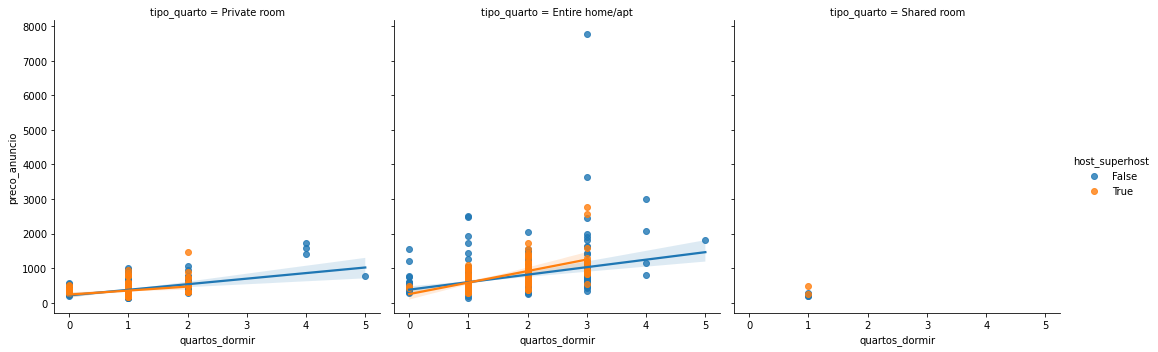

In [ ]:
sns.lmplot(data=df, x="quartos_dormir", y="preco_anuncio", col="tipo_quarto", hue="host_superhost")

## Diferença do preço do anúncio do quarto privativo , p/ o não privativo

> Anúncio mais barato é da sala compartilhada, seguido do quarto privado

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


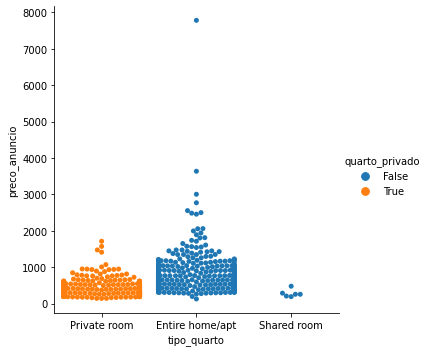

In [ ]:
# sns.catplot(data=dataset, kind="estilo_gráfico", x="var categorica", y="var_numerica", hue="var_categorica")
def grafico(dataset):
    sns.catplot(data=dataset, kind="swarm", x="tipo_quarto", 
                y="preco_anuncio", hue="quarto_privado")

grafico(df)

## Diferença de valores dos quartos compartilhados, privativos ou não

> anúncio do quarto compartilhado, não sendo privado, é mais em conta

> seguido do anúncio do quarto não compartilhado, sendo privado

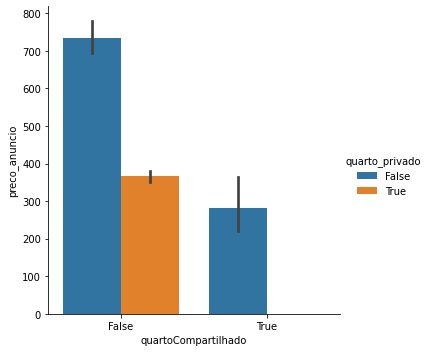

In [ ]:
sns.catplot(data=df, kind="bar", x="quartoCompartilhado", 
                y="preco_anuncio", hue="quarto_privado")    

## Preço do anúncio por número de quartos

> Mult quartos: o valor do anúncio para alguns quartos são maiores

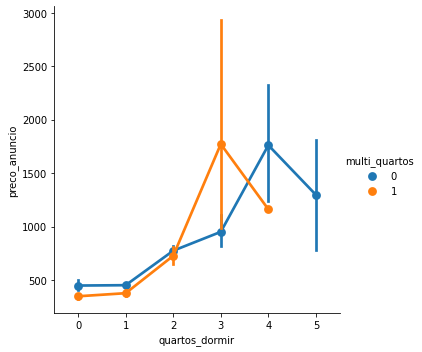

In [ ]:
sns.catplot(data=df, x="quartos_dormir", y="preco_anuncio", hue="multi_quartos", kind="point")

## Distribuição de frequência da variável preco_anuncio

> Assimétrica a direita

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


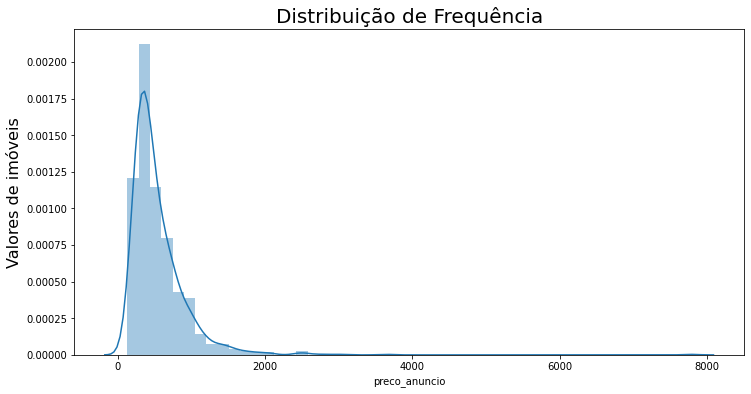

In [ ]:
ax =sns.distplot(df['preco_anuncio'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência', fontsize=20)
ax.set_ylabel('Valores de imóveis', fontsize=16)
ax = ax

## Variáveis correlativas

> Var correlação positiva: número de pessoas, quartos dormir

> Var correlação negativo: quartos privativos, distância do centro 

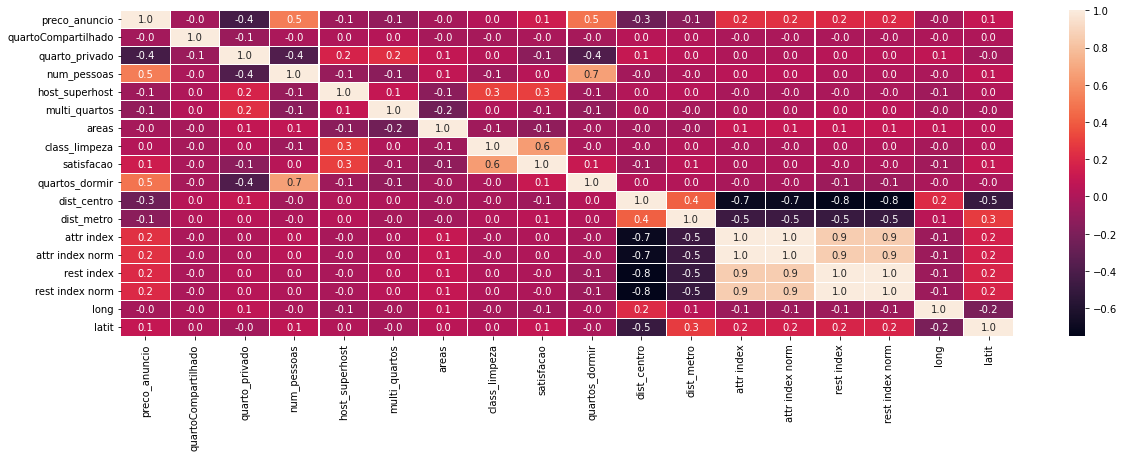

In [ ]:
data = df.corr()

fig, plot = plt.subplots(figsize=(20,6))
plot = sns.heatmap(data, annot = True, fmt=".1f", linewidths=.10)
plot

# Machine Learning

## Transformar os dados

> Usado para deixa os dados mais harmoniosos

> Usar caso a sua distribuição de frequência esteja assimétrica a direita, assimétrica a esquerda. Caso contrário não necessita

In [ ]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np


# Criando o modelo
ft = FunctionTransformer(np.log1p, validate=True)
transforme = ft.transform(df.select_dtypes(exclude=['object']))


# Pegando os nomes das colunas
colunas = df.select_dtypes(exclude=['object']).columns


# Juntando as variáveis
transforme = pd.concat([df.select_dtypes(include=['object']), 
                              pd.DataFrame(transforme, columns=colunas)], axis=1)
transforme.head()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,tipo_quarto,preco_anuncio,quartoCompartilhado,quarto_privado,num_pessoas,host_superhost,multi_quartos,areas,class_limpeza,satisfacao,quartos_dormir,dist_centro,dist_metro,attr index,attr index norm,rest index,rest index norm,long,latit
0,Private room,5.273172,0.0,0.693147,1.098612,0.000000,0.693147,0.000000,2.397895,4.543295,0.693147,1.795579,1.263952,4.378149,1.642236,4.597681,2.060064,1.775916,3.978143
1,Private room,5.844257,0.0,0.693147,1.609438,0.000000,0.000000,0.000000,2.197225,4.454347,0.693147,0.397695,0.214631,6.449168,3.538673,6.731353,4.083333,1.774961,3.977330
2,Private room,5.580112,0.0,0.693147,1.098612,0.000000,0.000000,0.693147,2.302585,4.477337,0.693147,1.909292,1.537216,4.334357,1.606615,4.568371,2.034274,1.787604,3.977081
3,Private room,6.074264,0.0,0.693147,1.609438,0.000000,0.000000,0.693147,2.302585,4.510860,1.098612,0.325601,0.364557,6.203087,3.300239,6.775404,4.126708,1.773964,3.977373
4,Private room,6.187346,0.0,0.693147,1.098612,0.693147,0.000000,0.000000,2.397895,4.595120,0.693147,0.434854,0.276641,6.316858,3.410247,6.704789,4.057191,1.775039,3.977344


## Distribuição de frequência da variável preco_anuncio

> Assimétrica quase assimétrica

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


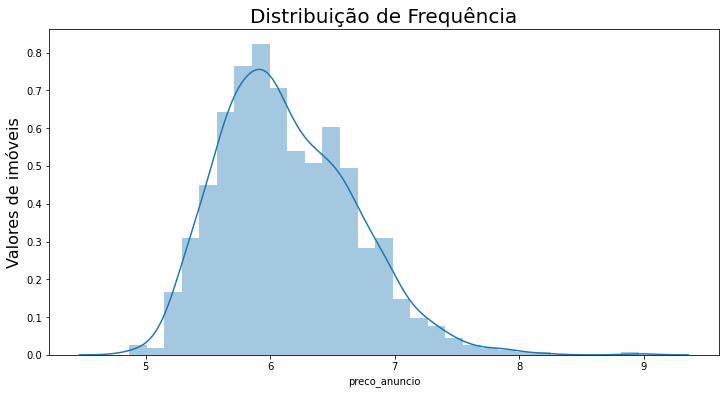

In [ ]:
ax =sns.distplot(transforme['preco_anuncio'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência', fontsize=20)
ax.set_ylabel('Valores de imóveis', fontsize=16)
ax = ax

## Dummies  (refazer)

> Transforma as colunas categoricos, em colunas numericas

> Tipos de registros nestas colunas: 0 ou 1 (não ou sim)

In [ ]:
categoricas = transforme.select_dtypes(include=['object']).columns

dummies = pd.get_dummies(transforme[categoricas])
dummies.head(2)

,tipo_quarto_Entire home/apt,tipo_quarto_Private room,tipo_quarto_Shared room
0,0,1,0
1,0,1,0


### Dataset original, sem transformação dos dados

In [ ]:
categoricas = transforme.select_dtypes(include=['object']).columns

dummies = pd.get_dummies(df[categoricas])
dummies.head(2)

,tipo_quarto_Entire home/apt,tipo_quarto_Private room,tipo_quarto_Shared room
0,0,1,0
1,0,1,0


## Concatenar com o dataset 

In [ ]:
df2 = pd.concat([transforme.drop(categoricas,axis=1), dummies], axis=1)
df2.head(3)

,preco_anuncio,quartoCompartilhado,quarto_privado,num_pessoas,host_superhost,multi_quartos,areas,class_limpeza,satisfacao,quartos_dormir,...,dist_metro,attr index,attr index norm,rest index,rest index norm,long,latit,tipo_quarto_Entire home/apt,tipo_quarto_Private room,tipo_quarto_Shared room
0,5.273172,0.0,0.693147,1.098612,0.0,0.693147,0.000000,2.397895,4.543295,0.693147,...,1.263952,4.378149,1.642236,4.597681,2.060064,1.775916,3.978143,0,1,0
1,5.844257,0.0,0.693147,1.609438,0.0,0.000000,0.000000,2.197225,4.454347,0.693147,...,0.214631,6.449168,3.538673,6.731353,4.083333,1.774961,3.977330,0,1,0
2,5.580112,0.0,0.693147,1.098612,0.0,0.000000,0.693147,2.302585,4.477337,0.693147,...,1.537216,4.334357,1.606615,4.568371,2.034274,1.787604,3.977081,0,1,0


### Dataset original, sem transformação dos dados

In [ ]:
df = pd.concat([df.drop(categoricas,axis=1), dummies], axis=1)
df.head(3)

,preco_anuncio,quartoCompartilhado,quarto_privado,num_pessoas,host_superhost,multi_quartos,areas,class_limpeza,satisfacao,quartos_dormir,...,dist_metro,attr index,attr index norm,rest index,rest index norm,long,latit,tipo_quarto_Entire home/apt,tipo_quarto_Private room,tipo_quarto_Shared room
0,194.033698,False,True,2.0,False,1,0,10.0,93.0,1,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,0,1,0
1,344.245776,False,True,4.0,False,0,0,8.0,85.0,1,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,0,1,0
2,264.101422,False,True,2.0,False,0,1,9.0,87.0,1,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,0,1,0


## Verificar se houve um aumento na correlação das variáveis

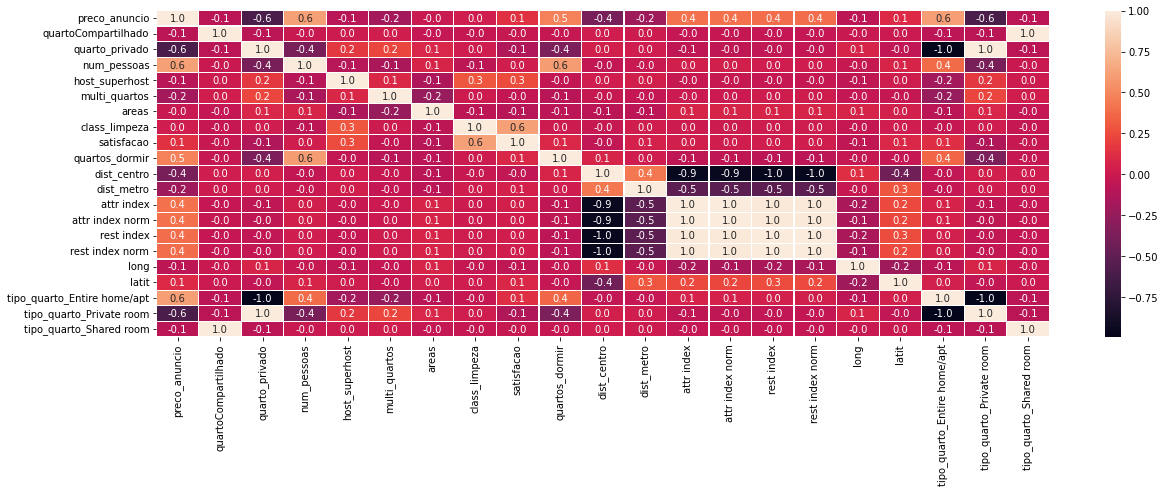

In [ ]:
data = df2.corr()

fig, plot = plt.subplots(figsize=(20,6))
plot = sns.heatmap(data, annot = True, fmt=".1f", linewidths=.10)
plot

## Distribuição de Frequência de cada variável

### Dispersão positiva

In [ ]:
df2.columns

Index(['preco_anuncio', 'quartoCompartilhado', 'quarto_privado', 'num_pessoas',
       'host_superhost', 'multi_quartos', 'areas', 'class_limpeza',
       'satisfacao', 'quartos_dormir', 'dist_centro', 'dist_metro',
       'attr index', 'attr index norm', 'rest index', 'rest index norm',
       'long', 'latit', 'tipo_quarto_Entire home/apt',
       'tipo_quarto_Private room', 'tipo_quarto_Shared room'],
      dtype='object')

Text(0.5, 1.07, 'Dispersão entre as Variáveis')

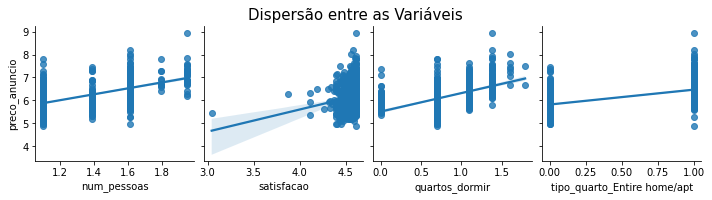

In [ ]:
ax = sns.pairplot(df2, y_vars='preco_anuncio', x_vars=['num_pessoas','satisfacao',
                                                      'quartos_dormir','tipo_quarto_Entire home/apt'], kind='reg')

ax.fig.suptitle('Dispersão entre as Variáveis',fontsize=15, y=1.07)
# Quanto mais espalhados os dados, maiores os erros
# Chuva tem uma relação negativa

### Dispersão negativa

Text(0.5, 1.07, 'Dispersão entre as Variáveis')

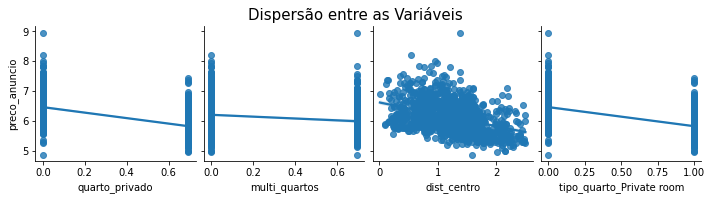

In [ ]:
ax = sns.pairplot(df2, y_vars='preco_anuncio', x_vars=['quarto_privado','multi_quartos',
                                                      'dist_centro','tipo_quarto_Private room'], kind='reg')

ax.fig.suptitle('Dispersão entre as Variáveis',fontsize=15, y=1.07)
# Quanto mais espalhados os dados, maiores os erros

## <font color=blue>Regression Linear

> Regressão linear é um modelo matemático que consegue, a partir da entrada de fenômenos, prever a causalidade deles. No caso da aplicação com dados imobiliários, conseguimos predizer um valor de um imóvel a partir da entrada de dados como a zona, quantidade de cômodos, dentre outras características.

> Essa predição vem do ajuste de uma reta (ou linha) que contempla uma função de relação de dados. Por essa função ter características lineares, chamamos o modelo de aprendizado de Regressão Linear.

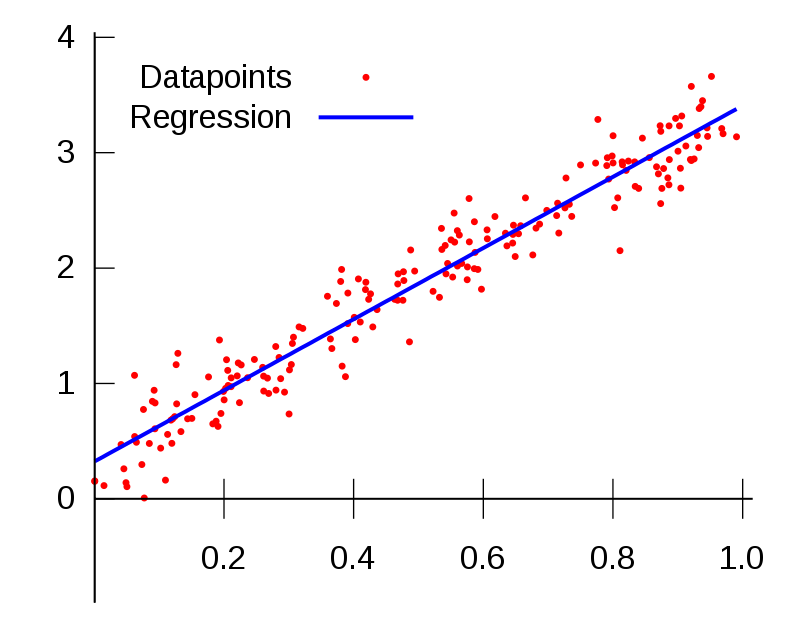

### Treinando os dados
**1° modelo: será com todas as variáveis**

In [ ]:
from sklearn.model_selection import train_test_split

x = df2.drop('preco_anuncio', axis=1)
y = df2['preco_anuncio']

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3,
                                                        random_state=350)

### Criando o modelo e treinando com o modelo criado

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
LR = LinearRegression()
LR.fit(x_treino, y_treino)
print('score de acerto do treino:',LR.score(x_treino, y_treino).round(2))

score de acerto do treino: 0.69


### Previsto de acerto do teste

In [ ]:
previsto = LR.predict(x_teste)
print('score de acerto do teste:',metrics.r2_score(y_teste, previsto).round(2))

score de acerto do teste: 0.67


### **Este dataset foi transformado, p/ verifcar os valores reais da previsão, precisa inverter a transformação**

In [ ]:
previsto_df = pd.DataFrame(previsto)
previsto_df.head(7)

,0
0,6.969650
1,5.791589
2,5.957503
3,5.318368
4,6.420663
5,6.467076
6,6.166438


In [ ]:
# Valor do anúncio 7° posição
np.expm1(6.166438)

475.4858371560696

### <font color=blue>Refazer o treino de máquina somente com Dataset original, sem transformação dos dados

**2° modelo: Criando o modelo e treinando com o modelo criado**

In [ ]:
from sklearn.model_selection import train_test_split

x2 = df.drop('preco_anuncio', axis=1)
y2 = df['preco_anuncio']

x_treino2, x_teste2, y_treino2, y_teste2 = train_test_split(x2,y2, test_size=0.3,
                                                        random_state=350)

In [ ]:
LR = LinearRegression()
LR.fit(x_treino2, y_treino2)
print('score de acerto do treino:',LR.score(x_treino2, y_treino2).round(2))

score de acerto do treino: 0.54


**Previsto de acerto do teste**

In [ ]:
previsto2 = LR.predict(x_teste2)
print('score de acerto do teste:',metrics.r2_score(y_teste2, previsto2).round(2))

score de acerto do teste: 0.3


In [ ]:
previsto_df2 = pd.DataFrame(previsto2)
previsto_df2.head(7)
# Valor do 7° anuncio 506.264651

,0
0,1028.465776
1,331.217940
2,442.043168
3,17.742042
4,735.843304
5,681.227809
6,506.264651


### <font color=teal>Refazer o treino de máquina somente com as variáveis com correlação acima de '0', sendo positivas ou negativas

**3° modelo: Criando o modelo e treinando com o modelo criado**

In [ ]:
from sklearn.model_selection import train_test_split

x3 = df2.drop(['preco_anuncio','areas', 'class_limpeza', 'attr index', 'attr index norm', 'rest index', 'rest index norm'], axis=1)
y3 = df2['preco_anuncio']

x_treino3, x_teste3, y_treino3, y_teste3 = train_test_split(x3,y3, test_size=0.3,
                                                        random_state=350)

In [ ]:
LR = LinearRegression()
LR.fit(x_treino3, y_treino3)
print('score de acerto do treino:',LR.score(x_treino3, y_treino3).round(2))

score de acerto do treino: 0.69


**Previsto de acerto do teste**

In [ ]:
previsto3 = LR.predict(x_teste3)
print('score de acerto do teste:',metrics.r2_score(y_teste3, previsto3).round(2))

score de acerto do teste: 0.66


In [ ]:
previsto_df3 = pd.DataFrame(previsto3)
previsto_df3.head(7)

,0
0,7.031494
1,5.793213
2,5.937012
3,5.361816
4,6.453125
5,6.512451
6,6.097656


In [ ]:
np.expm1(6.097656)

443.81390335918934

### statsmodels

>Prob (**F-statistic**): acima 0.05 modelo rejeitado
**P>|t|**: Acima 0.05 parametro ruim

In [ ]:
import statsmodels.api as sm

# Add uma 'constante' na variavel x_train
contante = sm.add_constant(x_treino)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


> Statsmodel rejeito o modelo

> Acusou algumas variáveis ruins

In [ ]:
statsmodels = sm.OLS(y_treino, contante, hasconst=True).fit()
statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          preco_anuncio   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     100.2
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          3.38e-180
Time:                        18:47:09   Log-Likelihood:                -145.97
No. Observations:                 772   AIC:                             327.9
Df Residuals:                     754   BIC:                             411.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         354.4586    129.974      2.727      0.007      99.305     609.612
quartoCompartilhado            70.4585     25.887      2.722      0.007      19.640     121.277
quarto_privado                 70.5379     25.884      2.725      0.007      19.724     121.351
num_pessoas                     0.7707      0.056     13.845      0.000       0.661       0.880
host_superhost                 -0.0077      0.037     -0.209      0.834      -0.080       0.065
multi_quartos                  -0.0667      0.036     -1.835      0.067      -0.138       0.005
areas                          -0.0606      0.053     -1.139      0.255      -0.165       0.044
class_limpeza                   0.1403      0.180      0.777      0.437      -0.214       0.495
satisfacao                      0.6268      0.234      2.680      0.008       0.168       1.086
quartos_dormir                  0.2659      0.044      6.086      0.000       0.180       0.352
dist_centro                    -0.1822      0.099     -1.844      0.066      -0.376       0.012
dist_metro                      0.0236      0.040      0.585      0.559      -0.055       0.103
attr index                      5.0233      4.821      1.042      0.298      -4.442      14.488
attr index norm                -5.0599      4.977     -1.017      0.310     -14.829       4.710
rest index                     -7.1265      7.369     -0.967      0.334     -21.593       7.340
rest index norm                 7.2913      7.494      0.973      0.331      -7.420      22.002
long                            0.9228      1.814      0.509      0.611      -2.639       4.484
latit                        -125.9915     46.488     -2.710      0.007    -217.254     -34.730
tipo_quarto_Entire home/apt   151.0438     55.285      2.732      0.006      42.514     259.574
tipo_quarto_Private room      101.7647     37.343      2.725      0.007      28.456     175.073
tipo_quarto_Shared room       101.6501     37.346      2.722      0.007      28.335     174.965
==============================================================================
Omnibus:                       90.033   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.194
Skew:                           0.716   Prob(JB):                     6.69e-38
Kurtosis:                       4.809   Cond. No.                     1.38e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.17e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### <font color=purple>Último teste de Machine Learning baseado no StatsModels

In [ ]:
from sklearn.model_selection import train_test_split

x4 = df2.drop(['preco_anuncio','host_superhost', 'areas', 'class_limpeza', 'dist_centro', 'dist_metro', 
               'attr index', 'attr index norm','rest index','rest index norm','long'], axis=1)

y4 = df2['preco_anuncio']

x_treino4, x_teste4, y_treino4, y_teste4 = train_test_split(x4,y4, test_size=0.3,
                                                        random_state=350)

**Modelo com os paramêtros do Statsmodels, foi melhor somente que o 2° modelo, o modelo sem transformação de dados**

In [ ]:
LR = LinearRegression()
LR.fit(x_treino4, y_treino4)
print('score de acerto do treino:',LR.score(x_treino4, y_treino4).round(2))

score de acerto do treino: 0.56


In [ ]:
previsto4 = LR.predict(x_teste4)
print('score de acerto do teste:',metrics.r2_score(y_teste4, previsto4).round(2))

score de acerto do teste: 0.53
